In [167]:
import requests

url_get = requests.get('https://monexnews.com/kurs-valuta-asing.htm?kurs=JPY&searchdatefrom=01-01-2019&searchdateto=31-12-2019')

In [168]:
url_get.content

b'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml">\n<head>\n<meta http-equiv="Content-Language" content="en,in" />\n<link rel="alternate" href="https://monexnews.com/kurs-valuta-asing.php" hreflang="en-ID" />\n<base href="https://monexnews.com/" target="_self" />\n<title>Kurs Yen Jepang | JPY | Harga Nilai Tukar Yen Hari Ini | Monexnews</title>\n<meta name="description" content="Kurs yen jepang JPY, nilai tukar rupiah terhadap harga yen hari ini berdasar kurs tengah BI, Bank Indonesia. " />\n<meta name="keywords" content="Kurs yen, jpy, nilai tukar yen, monexnews" />\n<meta property="og:image" content="favicon.jpg" />\n<meta name="author" content="Ultimaengine.com" />\n<meta name="robots" content="follow, index" />\n<meta name="revisit-after" content="7 days" />\n<meta name="viewport" content="width=device-width, initial-scale=1.0" />\n<meta name="google-site-verificati

In [169]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [170]:
print(soup.prettify())

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <meta content="en,in" http-equiv="Content-Language"/>
  <link href="https://monexnews.com/kurs-valuta-asing.php" hreflang="en-ID" rel="alternate"/>
  <base href="https://monexnews.com/" target="_self"/>
  <title>
   Kurs Yen Jepang | JPY | Harga Nilai Tukar Yen Hari Ini | Monexnews
  </title>
  <meta content="Kurs yen jepang JPY, nilai tukar rupiah terhadap harga yen hari ini berdasar kurs tengah BI, Bank Indonesia. " name="description"/>
  <meta content="Kurs yen, jpy, nilai tukar yen, monexnews" name="keywords"/>
  <meta content="favicon.jpg" property="og:image"/>
  <meta content="Ultimaengine.com" name="author"/>
  <meta content="follow, index" name="robots"/>
  <meta content="7 days" name="revisit-after"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta content="M7NOlgqcEadhl

In [171]:
table = soup.find('table', attrs={'class':'table'})
print(table.prettify()[1:500])

table class="table">
 <tr>
  <td>
   TANGGAL
  </td>
  <td>
   ASK
  </td>
  <td>
   BID
  </td>
 </tr>
 <tr class="verySoftGreyBg">
  <td>
   31 Desember 2019
  </td>
  <td>
   128,62
  </td>
  <td>
   127,32
  </td>
 </tr>
 <tr>
  <td>
   30 Desember 2019
  </td>
  <td>
   128,30
  </td>
  <td>
   127,02
  </td>
 </tr>
 <tr class="verySoftGreyBg">
  <td>
   27 Desember 2019
  </td>
  <td>
   128,11
  </td>
  <td>
   126,83
  </td>
 </tr>
 <tr>
  <td>
   26 Desember 2019
  </td>
  <td>
   128,


In [201]:
tr = table.find_all("tr")
print(len(tr))

247


In [202]:
temp = []

for i in range(1, len(tr)):
    row = table.find_all('tr')[i]
    
    period = row.find_all('td')[0].text.replace(u'\xa0', ' ')
    period = period.strip()
    
    ask = row.find_all('td')[1].text
    ask = ask.strip()
    
    bid = row.find_all('td')[2].text
    bid = bid.strip()    
    
    temp.append((period,ask,bid)) 
    
temp

[('31 Desember 2019', '128,62', '127,32'),
 ('30 Desember 2019', '128,30', '127,02'),
 ('27 Desember 2019', '128,11', '126,83'),
 ('26 Desember 2019', '128,27', '126,98'),
 ('23 Desember 2019', '128,39', '127,10'),
 ('20 Desember 2019', '128,63', '127,34'),
 ('19 Desember 2019', '128,24', '126,93'),
 ('18 Desember 2019', '128,64', '127,32'),
 ('17 Desember 2019', '128,62', '127,33'),
 ('16 Desember 2019', '128,67', '127,36'),
 ('13 Desember 2019', '128,30', '127,02'),
 ('12 Desember 2019', '130,04', '128,71'),
 ('11 Desember 2019', '129,65', '128,34'),
 ('10 Desember 2019', '129,56', '128,26'),
 ('09 Desember 2019', '129,76', '128,44'),
 ('06 Desember 2019', '129,78', '128,45'),
 ('05 Desember 2019', '130,10', '128,77'),
 ('04 Desember 2019', '130,79', '129,45'),
 ('03 Desember 2019', '130,15', '128,82'),
 ('02 Desember 2019', '129,36', '128,04'),
 ('29 November 2019', '129,44', '128,12'),
 ('28 November 2019', '129,47', '128,15'),
 ('27 November 2019', '129,84', '128,53'),
 ('26 Novem

In [203]:
temp = temp[::-1]
temp

[('02 Januari 2019', '132,89', '131,54'),
 ('03 Januari 2019', '135,44', '134,08'),
 ('04 Januari 2019', '133,51', '132,17'),
 ('07 Januari 2019', '130,86', '129,51'),
 ('08 Januari 2019', '129,84', '128,52'),
 ('09 Januari 2019', '130,31', '129,00'),
 ('10 Januari 2019', '131,22', '129,88'),
 ('11 Januari 2019', '130,62', '129,31'),
 ('14 Januari 2019', '130,52', '129,19'),
 ('15 Januari 2019', '130,56', '129,23'),
 ('16 Januari 2019', '131,11', '129,75'),
 ('17 Januari 2019', '130,61', '129,27'),
 ('18 Januari 2019', '130,37', '129,03'),
 ('21 Januari 2019', '130,31', '128,98'),
 ('22 Januari 2019', '130,39', '129,07'),
 ('23 Januari 2019', '130,05', '128,75'),
 ('24 Januari 2019', '129,79', '128,48'),
 ('25 Januari 2019', '129,68', '128,37'),
 ('28 Januari 2019', '128,97', '127,65'),
 ('29 Januari 2019', '129,74', '128,43'),
 ('30 Januari 2019', '129,79', '128,47'),
 ('31 Januari 2019', '129,92', '128,60'),
 ('01 Februari 2019', '129,05', '127,75'),
 ('04 Februari 2019', '128,24', '

In [204]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.3f' % x)

jpy = pd.DataFrame(temp, columns = ('Date','Kurs Jual','Kurs Beli'))
jpy.iloc[130:240]

,Date,Kurs Jual,Kurs Beli
130,19 Juli 2019,"130,04","128,72"
131,22 Juli 2019,"129,98","128,65"
132,23 Juli 2019,"130,00","128,67"
133,24 Juli 2019,"130,15","128,84"
134,25 Juli 2019,"129,98","128,65"
...,...,...,...
235,13 Desember 2019,"128,30","127,02"
236,16 Desember 2019,"128,67","127,36"
237,17 Desember 2019,"128,62","127,33"
238,18 Desember 2019,"128,64","127,32"


In [205]:
jpy.dtypes

Date         object
Kurs Jual    object
Kurs Beli    object
dtype: object

In [206]:
jpy[['Kurs Jual','Kurs Beli']] = jpy[['Kurs Jual','Kurs Beli']].replace(",",".", regex=True)
jpy[['Kurs Jual','Kurs Beli']] = jpy[['Kurs Jual','Kurs Beli']].replace(" %","")
jpy[['Kurs Jual','Kurs Beli']] = jpy[['Kurs Jual','Kurs Beli']].astype('float64')

In [207]:
jpy['Date'] = jpy['Date'].apply(lambda x: x.replace('Januari', 'January'))
jpy['Date'] = jpy['Date'].apply(lambda x: x.replace('Februari', 'February'))
jpy['Date'] = jpy['Date'].apply(lambda x: x.replace('Maret', 'March'))
jpy['Date'] = jpy['Date'].apply(lambda x: x.replace('April', 'April'))
jpy['Date'] = jpy['Date'].apply(lambda x: x.replace('Mei', 'May'))
jpy['Date'] = jpy['Date'].apply(lambda x: x.replace('Juni', 'June'))
jpy['Date'] = jpy['Date'].apply(lambda x: x.replace('Juli', 'July'))
jpy['Date'] = jpy['Date'].apply(lambda x: x.replace('Agustus', 'August'))
jpy['Date'] = jpy['Date'].apply(lambda x: x.replace('September', 'September'))
jpy['Date'] = jpy['Date'].apply(lambda x: x.replace('Oktober', 'October'))
jpy['Date'] = jpy['Date'].apply(lambda x: x.replace('November', 'November'))
jpy['Date'] = jpy['Date'].apply(lambda x: x.replace('Desember', 'December'))
jpy['Date'] = pd.to_datetime(jpy['Date'])
jpy.tail()

,Date,Kurs Jual,Kurs Beli
241,2019-12-23,128.390,127.100
242,2019-12-26,128.270,126.980
243,2019-12-27,128.110,126.830
244,2019-12-30,128.300,127.020
245,2019-12-31,128.620,127.320


In [208]:
print(len(jpy))
print(jpy.dtypes)

246
Date         datetime64[ns]
Kurs Jual           float64
Kurs Beli           float64
dtype: object


In [209]:
jpy['Month'] = jpy['Date'].dt.month_name().astype('category')
jpy.head()

,Date,Kurs Jual,Kurs Beli,Month
0,2019-01-02,132.890,131.540,January
1,2019-01-03,135.440,134.080,January
2,2019-01-04,133.510,132.170,January
3,2019-01-07,130.860,129.510,January
4,2019-01-08,129.840,128.520,January


In [210]:
jpy_month = jpy.drop(columns=['Date'], axis=1)
cols = list(jpy_month.columns)
cols = [cols[-1]] + cols[:-1]
jpy_month = jpy_month[cols]
jpy_month_avg = jpy_month.groupby("Month").mean()
jpy_month_avg

,Kurs Jual,Kurs Beli
Month,,
April,127.367,126.071
August,134.738,133.372
December,129.099,127.791
February,127.863,126.571
January,130.750,129.422
July,130.464,129.133
June,132.401,131.046
March,128.524,127.218
May,131.473,130.135


In [211]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October','November', 'December']
jpy_month_avg = jpy_month_avg.reindex(month_order)
jpy_month_avg.reset_index()

,Month,Kurs Jual,Kurs Beli
0,January,130.750,129.422
1,February,127.863,126.571
2,March,128.524,127.218
3,April,127.367,126.071
4,May,131.473,130.135
5,June,132.401,131.046
6,July,130.464,129.133
7,August,134.738,133.372
8,September,132.009,130.664
9,October,131.216,129.884


Text(0.5, 1.0, '2019 JPY Forex Fluctuation ')

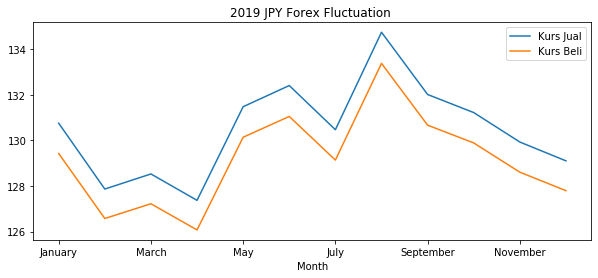

In [188]:
jpy_month_avg.plot(figsize=(10,4))
plt.title('2019 JPY Forex Fluctuation ')

In [190]:
jpy_spread = jpy_month_avg.copy()
jpy_spread['Spread'] = jpy_spread['Kurs Jual'] - jpy_spread['Kurs Beli']
jpy_spread.drop(['Kurs Jual','Kurs Beli'],axis=1, inplace=True)
jpy_spread

,Spread
Month,
January,1.328
February,1.292
March,1.306
April,1.296
May,1.338
June,1.355
July,1.331
August,1.365
September,1.345


Text(0.5, 1.0, '2019 JPY Forex Spread Fluctuation ')

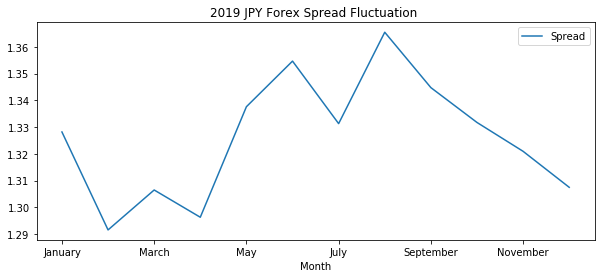

In [191]:
jpy_spread.plot(figsize=(10,4))
plt.title('2019 JPY Forex Spread Fluctuation ')